In [2]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

/Users/raymonddelacruz/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/raymonddelacruz/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pwd

u'/Users/raymonddelacruz/DS-SF-36/classes'

In [4]:
def read_dataset():
    return pd.read_csv(os.path.join("~",'DS-SF-36', 'classes', 'dataset-13-walget-train.csv'), index_col = 'AccountHolderImpliedGender')

df = read_dataset()

In [ ]:
df

In [275]:
df.mean()

IsPregnant    0.5
dtype: float64

In [276]:
df.var()

IsPregnant    0.250417
dtype: float64

In [277]:
df.median()

IsPregnant    0.5
dtype: float64

In [278]:
df.count()

AccountHolderAddress                              594
RecentlyPurchasedPregnancyTest                    594
RecentlyPurchasedBirthControl                     593
RecentlyPurchasedFeminineHygieneProducts          590
RecentlyPurchasedFolicAcidSupplements             599
                                                 ... 
RecentlyPurchasedSmokingCessationProducts         588
PurchasedWineRegularlyUntilRecentlyThenStopped    588
RecentlyPurchasedWine                             592
RecentlyPurchasedMaternityClothing                597
IsPregnant                                        600
Length: 17, dtype: int64

In [279]:
df.isnull().sum()

AccountHolderAddress                               6
RecentlyPurchasedPregnancyTest                     6
RecentlyPurchasedBirthControl                      7
RecentlyPurchasedFeminineHygieneProducts          10
RecentlyPurchasedFolicAcidSupplements              1
                                                  ..
RecentlyPurchasedSmokingCessationProducts         12
PurchasedWineRegularlyUntilRecentlyThenStopped    12
RecentlyPurchasedWine                              8
RecentlyPurchasedMaternityClothing                 3
IsPregnant                                         0
Length: 17, dtype: int64

In [280]:
df.describe()

,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
count,594,594,593,590,599,...,588,588,592,597,600
unique,3,2,2,2,2,...,2,2,2,2,2
top,Home,False,False,False,False,...,False,False,False,False,True
freq,295,549,516,502,533,...,550,510,528,519,300


In [281]:
df

,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
AccountHolderImpliedGender,,,,,,,,,,,
Female,Home,False,False,NaN,False,...,False,True,False,False,True
Female,PO Box,False,False,False,False,...,False,False,False,False,True
Male,Apartment,False,True,False,False,...,False,False,False,False,False
Male,Home,False,False,False,False,...,False,False,False,False,True
Female,PO Box,False,False,False,False,...,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Male,Home,False,False,False,False,...,NaN,False,False,False,False
Female,Home,True,False,False,True,...,False,False,False,False,True
Male,Apartment,False,False,False,True,...,False,False,False,False,True


In [282]:
#df.replace(True, 1)

#df.replace(False, 0)

#df.replace(np.NaN, 'Is Null value', inplace=True)

In [283]:
df.iloc[2,5]

False

In [284]:
df.columns

Index([u'AccountHolderAddress', u'RecentlyPurchasedPregnancyTest',
       u'RecentlyPurchasedBirthControl',
       u'RecentlyPurchasedFeminineHygieneProducts',
       u'RecentlyPurchasedFolicAcidSupplements',
       u'RecentlyPurchasedPrenatalVitamins',
       u'RecentlyPurchasedPrenatalYogaDVD', u'RecentlyPurchasedBodyPillow',
       u'RecentlyPurchasedGingerAle', u'RecentlyPurchasedSeaBands',
       u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedCigarettes',
       u'RecentlyPurchasedSmokingCessationProducts',
       u'PurchasedWineRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedWine', u'RecentlyPurchasedMaternityClothing',
       u'IsPregnant'],
      dtype='object')

In [285]:
for column in df.columns[1:]:
    print df.loc[:, column].unique()
    df.loc[:, column] *= 1.

[False True nan]
[False True nan]
[nan False True]
[False True nan]
[True False nan]
[False True nan]
[False True nan]
[False True nan]
[True False nan]
[False True nan]
[False True nan]
[False True nan]
[True False nan]
[False nan True]
[False True nan]
[ True False]


In [286]:
df = df.dropna()

In [287]:
df

,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
AccountHolderImpliedGender,,,,,,,,,,,
Female,PO Box,0,0,0,0,...,0,0,0,0,1.0
Male,Apartment,0,1,0,0,...,0,0,0,0,0.0
Male,Home,0,0,0,0,...,0,0,0,0,1.0
Female,PO Box,0,0,0,0,...,0,0,0,0,0.0
Female,Home,0,1,0,0,...,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Male,Apartment,0,0,0,0,...,0,0,0,0,1.0
Male,Home,0,0,1,0,...,0,0,0,0,0.0
Female,Home,1,0,0,1,...,0,0,0,0,1.0


In [288]:
df

,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
AccountHolderImpliedGender,,,,,,,,,,,
Female,PO Box,0,0,0,0,...,0,0,0,0,1.0
Male,Apartment,0,1,0,0,...,0,0,0,0,0.0
Male,Home,0,0,0,0,...,0,0,0,0,1.0
Female,PO Box,0,0,0,0,...,0,0,0,0,0.0
Female,Home,0,1,0,0,...,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Male,Apartment,0,0,0,0,...,0,0,0,0,1.0
Male,Home,0,0,1,0,...,0,0,0,0,0.0
Female,Home,1,0,0,1,...,0,0,0,0,1.0


In [289]:
df.reset_index(inplace=True)

In [290]:
df.head()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,PO Box,0,0,0,...,0,0,0,0,1.0
1,Male,Apartment,0,1,0,...,0,0,0,0,0.0
2,Male,Home,0,0,0,...,0,0,0,0,1.0
3,Female,PO Box,0,0,0,...,0,0,0,0,0.0
4,Female,Home,0,1,0,...,0,0,0,0,0.0


In [291]:
pd.get_dummies(df.AccountHolderAddress, prefix = 'Address_')

,Address__Apartment,Address__Home,Address__PO Box
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
490,1,0,0
491,0,1,0
492,0,1,0
493,1,0,0


In [292]:
Address = pd.get_dummies(df.AccountHolderAddress, prefix = 'Address_')

In [293]:
df.AccountHolderImpliedGender.replace('Male', 1, inplace = True)

In [294]:
df.AccountHolderImpliedGender.replace('Female', 0, inplace = True)

In [295]:
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,0.0,PO Box,0,0,0,...,0,0,0,0,1.0
1,1.0,Apartment,0,1,0,...,0,0,0,0,0.0
2,1.0,Home,0,0,0,...,0,0,0,0,1.0
3,0.0,PO Box,0,0,0,...,0,0,0,0,0.0
4,0.0,Home,0,1,0,...,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
490,1.0,Apartment,0,0,0,...,0,0,0,0,1.0
491,1.0,Home,0,0,1,...,0,0,0,0,0.0
492,0.0,Home,1,0,0,...,0,0,0,0,1.0
493,1.0,Apartment,0,0,0,...,0,0,0,0,1.0


In [296]:
df.drop('AccountHolderAddress', axis = 1, inplace = True )

/Users/raymonddelacruz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [297]:
df

,AccountHolderImpliedGender,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,0.0,0,0,0,0,...,0,0,0,0,1.0
1,1.0,0,1,0,0,...,0,0,0,0,0.0
2,1.0,0,0,0,0,...,0,0,0,0,1.0
3,0.0,0,0,0,0,...,0,0,0,0,0.0
4,0.0,0,1,0,0,...,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
490,1.0,0,0,0,0,...,0,0,0,0,1.0
491,1.0,0,0,1,0,...,0,0,0,0,0.0
492,0.0,1,0,0,1,...,0,0,0,0,1.0
493,1.0,0,0,0,1,...,0,0,0,0,1.0


In [298]:
df = pd.concat([df, Address], axis = 1).copy()

In [299]:
df

,AccountHolderImpliedGender,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,...,RecentlyPurchasedMaternityClothing,IsPregnant,Address__Apartment,Address__Home,Address__PO Box
0,0.0,0,0,0,0,...,0,1.0,0,0,1
1,1.0,0,1,0,0,...,0,0.0,1,0,0
2,1.0,0,0,0,0,...,0,1.0,0,1,0
3,0.0,0,0,0,0,...,0,0.0,0,0,1
4,0.0,0,1,0,0,...,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
490,1.0,0,0,0,0,...,0,1.0,1,0,0
491,1.0,0,0,1,0,...,0,0.0,0,1,0
492,0.0,1,0,0,1,...,0,1.0,0,1,0
493,1.0,0,0,0,1,...,0,1.0,1,0,0


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 20 columns):
AccountHolderImpliedGender                              446 non-null float64
RecentlyPurchasedPregnancyTest                          495 non-null object
RecentlyPurchasedBirthControl                           495 non-null object
RecentlyPurchasedFeminineHygieneProducts                495 non-null object
RecentlyPurchasedFolicAcidSupplements                   495 non-null object
RecentlyPurchasedPrenatalVitamins                       495 non-null object
RecentlyPurchasedPrenatalYogaDVD                        495 non-null object
RecentlyPurchasedBodyPillow                             495 non-null object
RecentlyPurchasedGingerAle                              495 non-null object
RecentlyPurchasedSeaBands                               495 non-null object
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    495 non-null object
RecentlyPurchasedCigarettes                             49

In [301]:
pd.set_option("max.columns", 30)

In [302]:
df *= 1

In [303]:
df = df.astype(float)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 20 columns):
AccountHolderImpliedGender                              446 non-null float64
RecentlyPurchasedPregnancyTest                          495 non-null float64
RecentlyPurchasedBirthControl                           495 non-null float64
RecentlyPurchasedFeminineHygieneProducts                495 non-null float64
RecentlyPurchasedFolicAcidSupplements                   495 non-null float64
RecentlyPurchasedPrenatalVitamins                       495 non-null float64
RecentlyPurchasedPrenatalYogaDVD                        495 non-null float64
RecentlyPurchasedBodyPillow                             495 non-null float64
RecentlyPurchasedGingerAle                              495 non-null float64
RecentlyPurchasedSeaBands                               495 non-null float64
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    495 non-null float64
RecentlyPurchasedCigarettes                     

In [323]:
df.RecentlyPurchasedPregnancyTest.sum()

41.0

In [310]:
X = df[ [("RecentlyPurchasedPregnancyTest")] ]
y = df[("IsPregnant")]

linreg = LinearRegression()

linreg.fit(X, y)
pred = linreg.predict(X);

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=4)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

In [317]:
pd.crosstab(y_train_preds, y_train)

IsPregnant,0.0,1.0
row_0,,
0.0,156,114
1.0,1,26


In [318]:
pd.crosstab(y_test_preds, y_test)

IsPregnant,0.0,1.0
row_0,,
0.0,86,98
1.0,3,11


In [324]:
pd.crosstab(df.RecentlyPurchasedPregnancyTest, df.IsPregnant)

IsPregnant,0.0,1.0
RecentlyPurchasedPregnancyTest,,
0.0,242,212
1.0,4,37


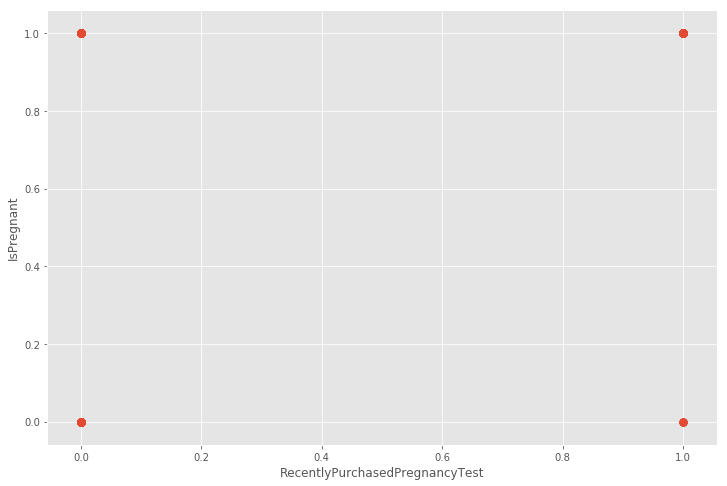

In [312]:
plt.figure(figsize=(12,8))
plt.scatter(df.RecentlyPurchasedPregnancyTest, df.IsPregnant, s=60)
plt.xlabel("RecentlyPurchasedPregnancyTest")
plt.ylabel("IsPregnant");

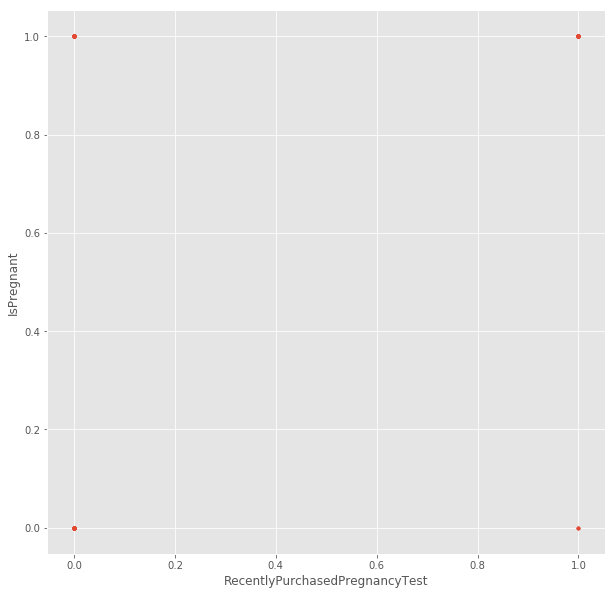

In [321]:
X = df[ [("RecentlyPurchasedBirthControl")] ]
y = df[("IsPregnant")]

linreg = LinearRegression()

linreg.fit(X, y)
pred = linreg.predict(X);

plt.figure(figsize=(10,10))
plt.scatter(df.RecentlyPurchasedPregnancyTest, df.IsPregnant, s=10)
plt.xlabel("RecentlyPurchasedPregnancyTest")
plt.ylabel("IsPregnant");